# Laporan Proyek Machine Learning - Norman Dwi Febrio

## Domain Proyek

Dalam menghadapi masalah lingkungan yang semakin meningkat dan meningkatnya permintaan akan kehidupan yang berkelanjutan, mengoptimalkan penggunaan energi dalam bangunan telah menjadi tujuan utama. Efisiensi energi tidak hanya mengurangi dampak lingkungan, tetapi juga secara signifikan menurunkan biaya operasional bagi pemilik rumah dan bisnis. Proyek ini bertujuan untuk memanfaatkan kekuatan ilmu data untuk mengembangkan model prediktif yang dapat secara akurat memperkirakan efisiensi energi bangunan.

### Mengapa dan Bagaimana Masalah Ini Harus Diselesaikan

Bangunan mengkonsumsi sebagian besar sumber daya energi dunia. Pemodelan prediktif memainkan peran penting dalam bidang efisiensi energi, yang memungkinkan arsitek, insinyur, dan pembuat kebijakan untuk membuat keputusan yang tepat. Dengan memahami hubungan antara berbagai fitur bangunan dan konsumsi energi, menjadi mungkin untuk merancang struktur yang ramah lingkungan dan layak secara ekonomi.

## Business Understanding

Di dunia yang berkembang pesat saat ini, efisiensi energi menjadi landasan pembangunan berkelanjutan. Lanskap bisnis semakin dibentuk oleh kesadaran lingkungan, tuntutan peraturan, dan konsumen yang sadar akan biaya. Dalam konteks ini, para pelaku bisnis, arsitek, dan pembuat kebijakan mencari solusi inovatif untuk mengoptimalkan penggunaan energi, terutama di sektor konstruksi di mana bangunan menyumbang sebagian besar konsumsi energi global. Proyek ini membahas masalah-masalah yang mendesak ini dengan menggunakan teknik pemodelan prediktif untuk meningkatkan pemahaman kita tentang efisiensi energi pada bangunan.

### Problem Statements

Berdasarkan dari penjelasan di atas, akan dikembangkan sebuah sistem prediksi efisiensi energi pada bangunan untuk menjawab permasalahan berikut:
1. Faktor apa saja yang memiliki pengaruh terhadap efisiensi energi?
2. Berapa beban pemanasan dan pendinginan jika suatu bangunan memiliki ciri tertentu?

### Goals

Tujuan dari dibuatnya proyek ini yaitu:
1. Mengetahui faktor apa saja yang memiliki pengaruh terhadap efisiensi energi.
2. Membuat model machine learning yang dapat memprediksi beban pemanasan dan pendinginan jika suatu bangunan memiliki ciri tertentu.

### Solution Statements

Solusi yang dapat diimplementasikan untuk mencapai tujuan adalah sebagai berikut:
1. Mengembangkan beberapa model machine learning, baik menggunakan Deep Learning, K-Nearest Neighbor, Random Forest, dan Boosting Algorithm.
2. Memilih model terbaik yang telah dikembangkan dengan mempertimbangkan nilai metrik evaluasi yang didapatkan.

## Data Understanding

Dataset yang saya gunakan untuk menyelesaikan proyek ini adalah dataset "Effiency Energy" yang dibuat oleh Athanasios Tsanas dan Angeliki Xifara. Mereka melakukan analisis energi menggunakan 12 bentuk bangunan yang berbeda yang disimulasikan pada Ecotect. Bangunan-bangunan tersebut berbeda dalam hal area kaca, distribusi area kaca, dan orientasi, di antara parameter lainnya. Mereka mensimulasikan berbagai pengaturan sebagai fungsi dari karakteristik yang telah disebutkan sebelumnya untuk mendapatkan 768 bentuk bangunan. Kumpulan data terdiri dari 768 sampel dan 8 fitur, yang bertujuan untuk memprediksi dua respons bernilai nyata.

Dataset tersebut dapat Anda akses melaluli link ini: https://archive.ics.uci.edu/dataset/242/energy+efficiency.

### Data Acquisition

Untuk mendapatkan dataset yang akan digunakan, kita unduh berkasnya melalui wget command.

In [1]:
!wget --no-check-certificate \
    https://archive.ics.uci.edu/static/public/242/energy+efficiency.zip\
    -O energy_efficiency.zip

--2023-10-11 17:32:14--  https://archive.ics.uci.edu/static/public/242/energy+efficiency.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'energy_efficiency.zip'

     0K .......... .......... .......... .......... .......... 85,8K
    50K .......... .......... ....                             5,21M=0,6s

2023-10-11 17:32:15 (127 KB/s) - 'energy_efficiency.zip' saved [76321]



Setelah selesai mengunduhnya, berkasnya otomatis tersimpan dalam folder yang sama dengan notebook ini dengan format zip file. Karena berkasnya merupakan zip, kita ekstrak terlebih dahulu menggunakan zipfile module.

In [2]:
import zipfile

In [3]:
zip_fn = "energy_efficiency.zip"
zip_ref = zipfile.ZipFile(zip_fn, "r")
zip_ref.extractall()
zip_ref.close()

Berkas telah berhasil diekstrak dan menghasilkan satu berkas excel dengan nama berkas "ENB2012_data.xlsx".

Setelah itu, kita buka datasetnya dan tampilkan dalam bentuk dataframe menggunakan pandas module.

In [4]:
import pandas as pd

In [5]:
# transform dataset menjadi pandas dataframe
energy_efficiency_df = pd.read_excel("ENB2012_data.xlsx")

# tampilkan 5 data pertama
energy_efficiency_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Kolom dari dataframe ini memiliki prefix "X" dan "Y" yang menunjukkan bahwa X adalah atribut dan Y adalah target. 

Sebelum kita melangkah lebih jauh lagi, kita ubah semua nama kolomnya terlebih dahulu. Berikut adalah nama-nama kolomnya, sesuai dengan yang disebutkan oleh author-nya:

1. X1	Relative Compactness
2. X2	Surface Area
3. X3	Wall Area
4. X4	Roof Area
5. X5	Overall Height
6. X6	Orientation
7. X7	Glazing Area
8. X8	Glazing Area Distribution
9. Y1	Heating Load
10. Y2	Cooling Load

Kita bisa menggunakan `rename()` function untuk mengubah nama-nama kolom tersebut.

In [6]:
energy_efficiency_df = energy_efficiency_df.rename(columns={"X1":"Relative_compactness",
                                                            "X2":"Surface_area",
                                                            "X3":"Wall_area",
                                                            "X4":"Roof_area",
                                                            "X5":"Overall_height",
                                                            "X6":"Orientation",
                                                            "X7":"Glazing_area",
                                                            "X8":"Glazing_area_distribution",
                                                            "Y1":"Heating_load",
                                                            "Y2":"Cooling_load"})

# Periksa nama-nama kolomnya
energy_efficiency_df.columns

Index(['Relative_compactness', 'Surface_area', 'Wall_area', 'Roof_area',
       'Overall_height', 'Orientation', 'Glazing_area',
       'Glazing_area_distribution', 'Heating_load', 'Cooling_load'],
      dtype='object')

Berikut adalah penjelasan dari tiap kolom:
1. Relative_compactness: Merepresentasikan se-padat apa bangunan tersebut.
2. Surface_area: Total luas permukaan bangunan (dinding, lantai, dan atap) dalam satuan meter persegi.
3. Wall_area: Luas dinding bangunan (eksterior dan interior) dalam satuan meter persegi.
4. Roof_area: Luas atap bangunan dalam satuan meter persegi.
5. Overall_height: Ketinggian total bangunan dalam satuan meter.
6. Orientation: Arah hadap bangunan. Direpresentasikan dalam bentuk data kategorik nominal.
7. Glazing_area: Luas area kaca atau jendela pada bangunan dalam satuan meter persegi.
8. Glazing_area_distribution: Persebaran letak kaca atau jendela pada bangunan. Direpresentasikan dalam bentuk data kategorik nominal.
9. Heating_load: Kebutuhan energi (dalam kW) untuk mempertahankan suhu di dalam bangunan pada saat pemanasan.
10. Cooling_load: kebutuhan energi (dalam kW) untuk mempertahankan suhu di dalam bangunan pada saat pendinginan.

In [7]:
energy_efficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_compactness       768 non-null    float64
 1   Surface_area               768 non-null    float64
 2   Wall_area                  768 non-null    float64
 3   Roof_area                  768 non-null    float64
 4   Overall_height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_area               768 non-null    float64
 7   Glazing_area_distribution  768 non-null    int64  
 8   Heating_load               768 non-null    float64
 9   Cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Dataset ini terdiri dari 768 data dan tidak memiliki missing values. Dari tipe datanya, kolom "Orientation" dan "Glazing_area_distribution" bertipe data integer. Ini karena kedua kolom tersebut merupakan data kategorik nominal. Mari kita cek nilainya dengan `value_counts()` function.

In [8]:
print("Orientation:\n", energy_efficiency_df['Orientation'].value_counts())
print("\n")
print("Glazing_area_distribution:\n", energy_efficiency_df['Glazing_area_distribution'].value_counts())

Orientation:
 2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64


Glazing_area_distribution:
 1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing_area_distribution, dtype: int64


Untuk kolom orientation, kategorinya adalah angka 2 - 5. Sejak penulisnya tidak memberikan penjelasan terkait representasi ini, kita bisa merepresentasikan bahwa 2 adalah utara, 3 timur, 4 selatan, dan 5 barat.

Untuk kolom Glazing_area_distribution, kategorinya adalah angka dari 0 - 5. Penulisnya juga tidak memberikan penjelasan terkait atribut ini.

Setelah itu, kita ubah tipe data dari kedua kolom ini menjadi kategori.

In [9]:
energy_efficiency_df['Orientation'] = energy_efficiency_df['Orientation'].astype('category')
energy_efficiency_df['Glazing_area_distribution'] = energy_efficiency_df['Glazing_area_distribution'].astype('category')

energy_efficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Relative_compactness       768 non-null    float64 
 1   Surface_area               768 non-null    float64 
 2   Wall_area                  768 non-null    float64 
 3   Roof_area                  768 non-null    float64 
 4   Overall_height             768 non-null    float64 
 5   Orientation                768 non-null    category
 6   Glazing_area               768 non-null    float64 
 7   Glazing_area_distribution  768 non-null    category
 8   Heating_load               768 non-null    float64 
 9   Cooling_load               768 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 50.0 KB


### Exploratory Data Analysis (EDA)

In [10]:
energy_efficiency_df.describe()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Glazing_area,Heating_load,Cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


Dari data statistik di atas, kita dapat mengambil informasi bahwa:
- Kepadatan relatif memiliki nilai rentang antara 62% sampai dengan 98% dengan nilai rata-rata 0.76 dan median 0.75. Semakin tinggi nilainya, semakin padat pula bangunannya.
- Luas total permukaan memiliki nilai rentang antara 514.5 meter persegi sampai dengan 808.5 meter persegi dengan nilai rata-rata 671.7 dan median 673.7.
- Luas dinding memiliki nilai rentang antara 245 meter persegi sampai dengan 416.5 meter persegi dengan nilai rata-rata 318.5 meter persegi dan median 318.5 meter persegi.
- Luas atap memiliki nilai rentang antara 110.25 meter persegi sampai dengan 220.5 meter persegi dengan nilai rata-rata 176.6 meter persegi dan median 183.75 meter persegi.
- Tinggi keseluruhan memiliki nilai rentang antara 3.5 meter sampai dengan 7 meter dengan nilai rata-rata 5.25 meter dan median 5.25 meter persegi.
- Luas kaca atau jendela memiliki nilai rentang antara 0% sampai dengan 40%.

Selanjutnya, kita cek sebaran antar kolom.

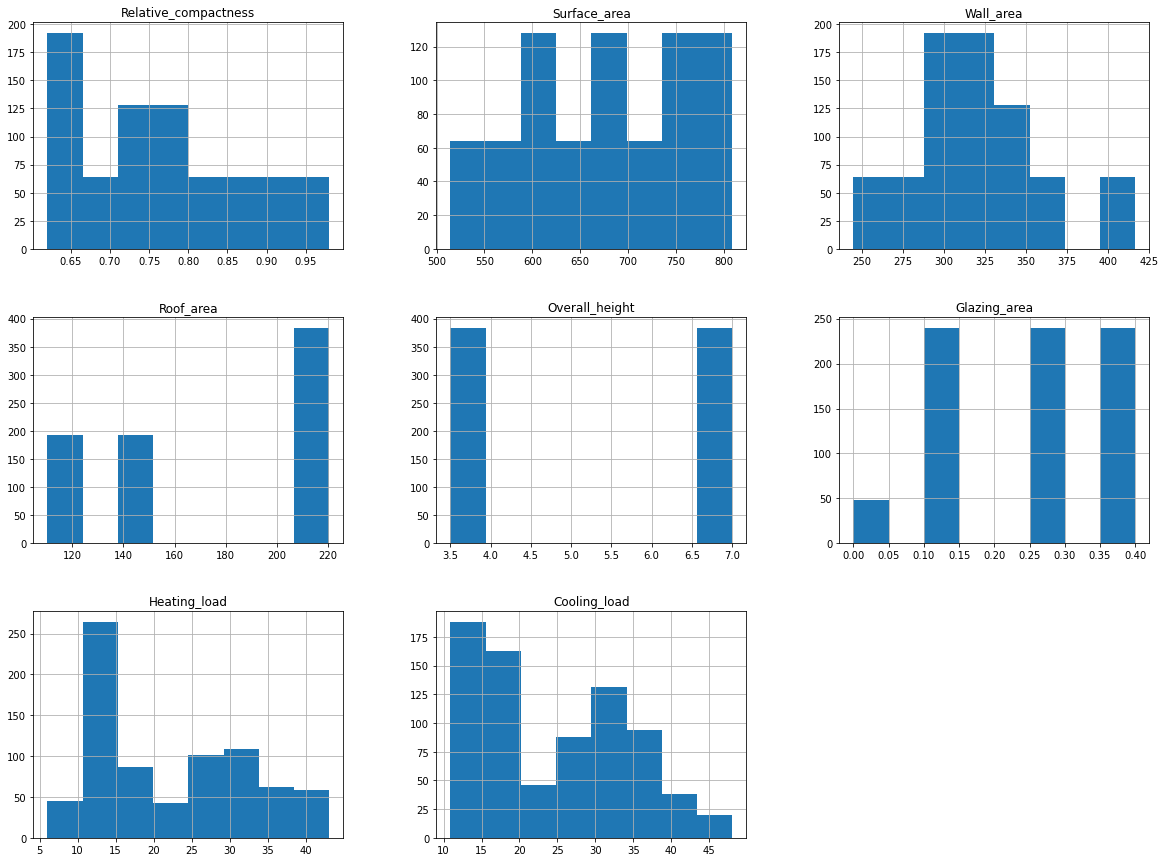

In [11]:
import matplotlib.pyplot as plt

energy_efficiency_df.hist(bins=8, figsize=(20, 15))
plt.show()

Ternyata, sebaran dari tiap atribut cenderung condong ke salah satu sisi. Dengan demikian pada tahapan normalisasi, kita perlu menggunakan metode Standardisasi.

Kita lihat korelasi antar kolom:

C:\Users\Norman Dwi Febrio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


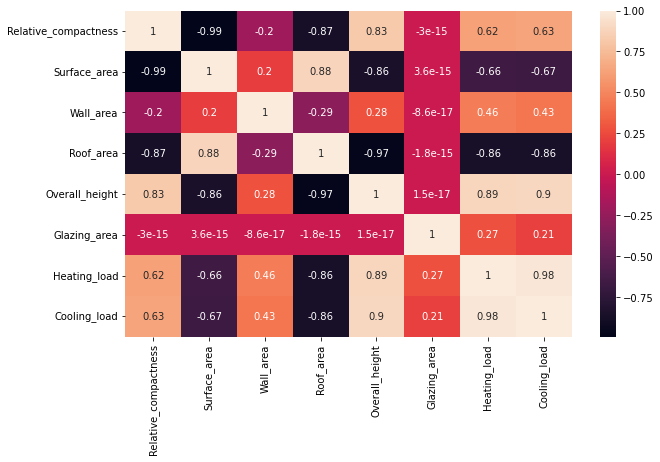

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_efficiency_df.corr(), annot=True)
plt.show()

Dari grafik heatmap di atas, kita dapat menyimpulkan bahwa:
1. Hubungan tiap variabel, selain wall area dan glazing area, terhadap heating load dan coolling load memiliki korelasi di atas 60% semua. 
2. Surface area dan roof area berkorelasi negatif terhadap heating load dan cooling load.
3. Relative compactness, wall area, overall height, dan glazing area berkorelasi positif dengan heating load dan coolling load.
4. Relative compactness dengan surface area memiliki korelasi yang sangat tinggi dan surface area memiliki korelasi yang lebih tinggi dengan variabel lainnya daripada relative compactness. Hal ini dapat menyebabkan kolinearitas dan berdampak pada hasil prediksi model. Oleh karena itu, kita perlu menghapus variabel surface area untuk menghindari kolinearitas.

Sekarang kita cek korelasi variabel kategori dengan heating load dan cooling load.

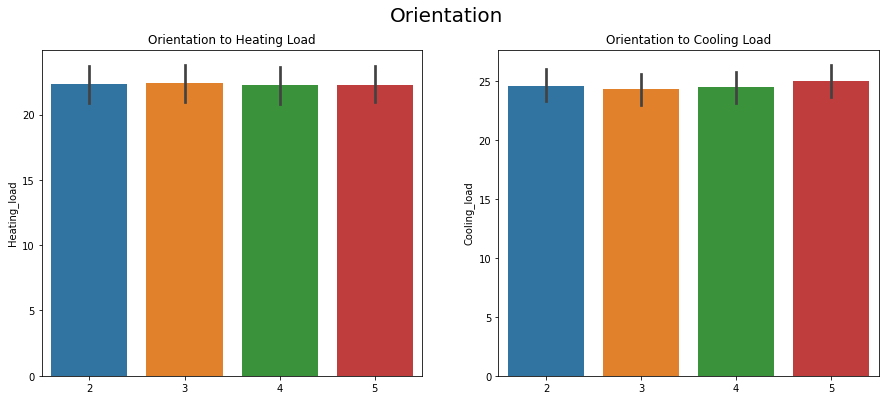

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(data=energy_efficiency_df, x='Orientation', y='Heating_load', ax=axs[0])
axs[0].set_title("Orientation to Heating Load")
axs[0].set_xlabel(None)
sns.barplot(data=energy_efficiency_df, x='Orientation', y='Cooling_load', ax=axs[1])
axs[1].set_title("Orientation to Cooling Load")
axs[1].set_xlabel(None)
plt.suptitle("Orientation", fontsize=20)
plt.show()

Dari grafik batang di atas, kita dapat menyimpulkan bahwa tiap kategori memiliki nilai yang tidak jauh beda. Artinya, mau bagaimanapun orientasi dari bangunan tersebut, heating load dan cooling load yang dibutuhkan sama saja. Dengan demikian, kita dapat menghapus variabel ini untuk mengurangi dimensionalitas.

Bagaimana dengan Glazing_area_distribution? Mari kita cek.

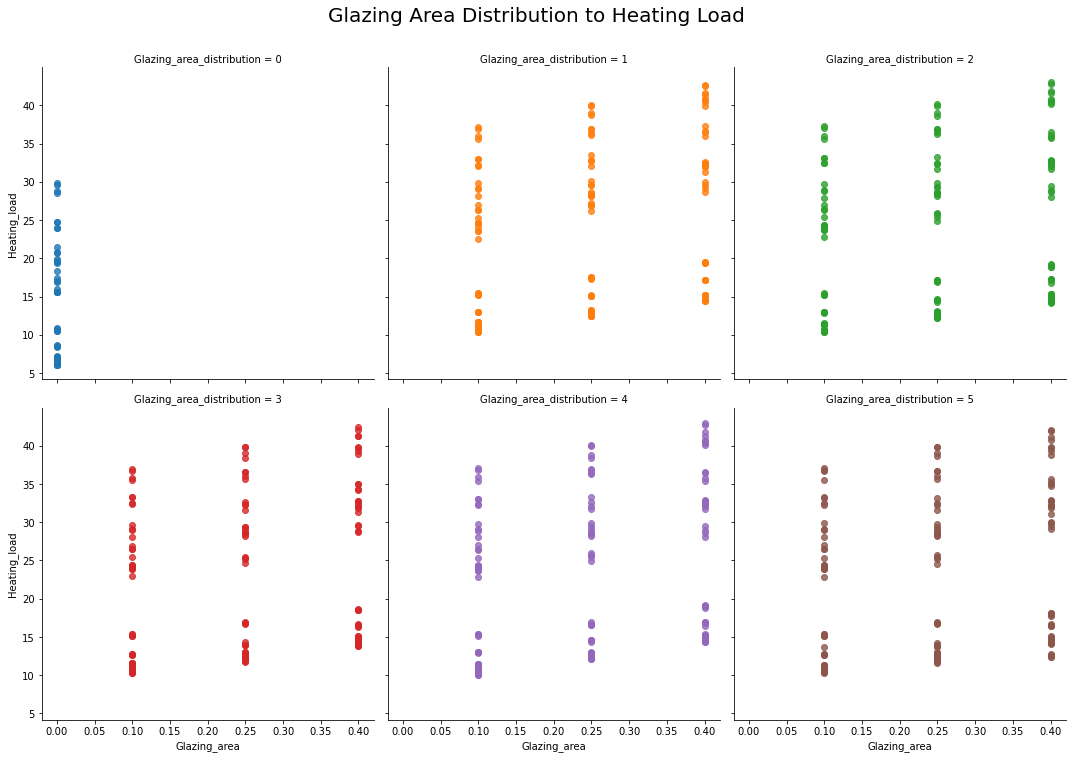

In [14]:
lmplot_ = sns.lmplot(data=energy_efficiency_df, x='Glazing_area', y='Heating_load', hue='Glazing_area_distribution',
                    col='Glazing_area_distribution', col_wrap=3, fit_reg=False)
lmplot_.fig.suptitle("Glazing Area Distribution to Heating Load", y=1.05, fontsize=20)
plt.show()

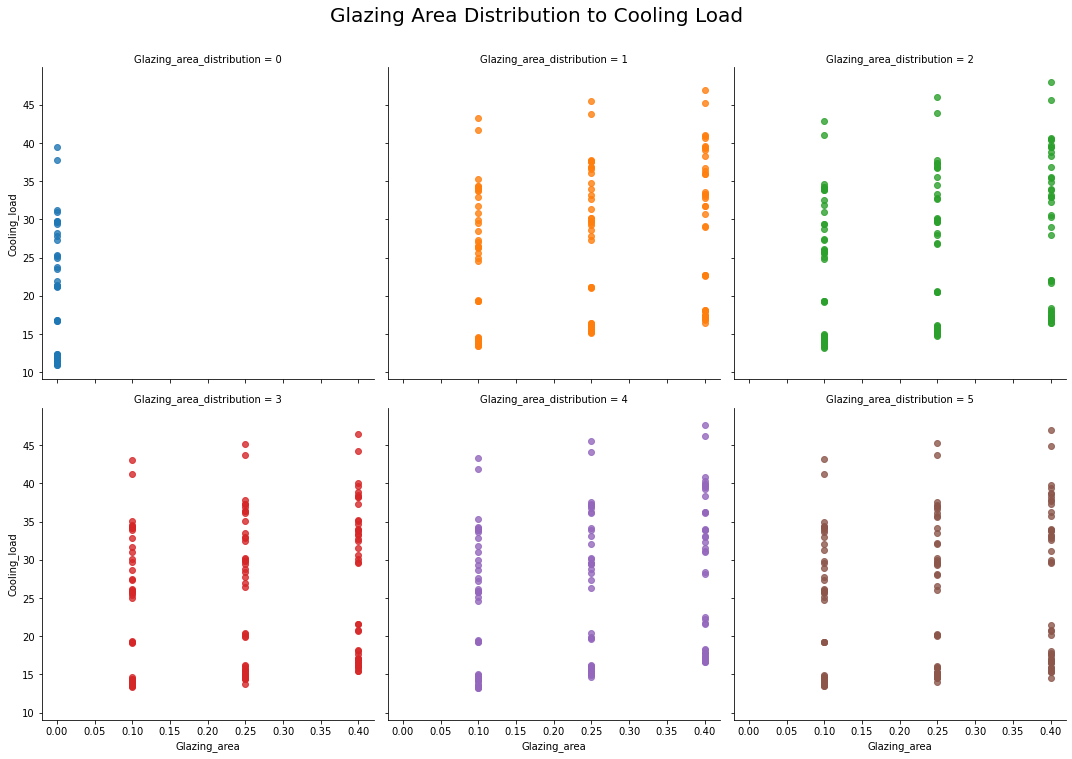

In [15]:
lmplot_ = sns.lmplot(data=energy_efficiency_df, x='Glazing_area', y='Cooling_load', hue='Glazing_area_distribution',
                    col='Glazing_area_distribution', col_wrap=3, fit_reg=False)
lmplot_.fig.suptitle("Glazing Area Distribution to Cooling Load", y=1.05, fontsize=20)
plt.show()

Selain 0, semua kategori memiliki pola yang identik. Dengan demikian, kita perlu membuat kategori ini sebagai kategori biner saja, yaitu 0 mewakili glazing area distribution 0, dan 1 mewakili semua glazing area distribution selain 0. Hal ini dilakukan untuk mengurangi dimensionalitas.

### Conclusion

Berdasarkan hasil ekslporasi yang didapatkan dari proses EDA, didapatkan kesimpulan:
1. Melakukan normalisasi pada tiap kolom numerik menggunakan metode standardisasi.
2. Menghapus variabel Surface_area untuk menghindari kolinearitas.
3. Menghapus variabel Orientation karena semua kategorinya memiliki nilai yang identik.
4. Melakukan binerisasi pada variabel Glazing_area_distribution. Nilai 0 untuk kategori 0, dan 1 untuk kategori selain 0.

## Data Preparation

Berdasarkan kesimpulan di atas, kita perlu melakukan tahapan pada variabel variabel dari dataset ini.

### Menghapus Kolom Surface_area dan Orientation

Tujuan dari menghapus kolom Surface_area adalah untuk menghindari dari kolinearitas yang dapat berdampak pada hasil prediksi model. Dan tujuan dari menghapus kolom Orientation adalah karena tiap kategorinya memiliki nilai yang identik.

In [16]:
energy_efficiency_df.drop(["Surface_area","Orientation"], axis=1, inplace=True)

In [17]:
energy_efficiency_df.columns

Index(['Relative_compactness', 'Wall_area', 'Roof_area', 'Overall_height',
       'Glazing_area', 'Glazing_area_distribution', 'Heating_load',
       'Cooling_load'],
      dtype='object')

### Melakukan Binerisasi Pada Kolom Glazing_area_distribution

Tujuan dari binerisasi ini adalah untuk mereduksi dimensionalitas dari dataset.

In [18]:
energy_efficiency_df["Glazing_area_distribution"] = energy_efficiency_df["Glazing_area_distribution"].replace({2:1,
                                                                                                               3:1,
                                                                                                               4:1,
                                                                                                               5:1})

In [19]:
energy_efficiency_df["Glazing_area_distribution"].unique()

[0, 1]
Categories (2, int64): [0, 1]

### Melakukan Normalisasi pada Atribut Numerik

Tujuan dilakukan normalisasi pada atribut numerik adalah agar semua atribut numerik pada dataset memiliki skala nilai yang seragam. Dengan menyeragamkan skala nilai pada seluruh atribut numerik, model yang dikembangkan dapat bekerja lebih efektif. 

Metode normalisasi yang akan digunakan pada tahapan ini adalah metode Standardisasi. Metode Standardisasi digunakan karena dataset yang kita gunakan saat ini memiliki sebaran nilai yang cenderung condong ke salah satu sisi. Setelah dilakukan standardisasi, variabel tersebut akan memiliki nilai rata-rata 0 dan standar deviasi 1. Adapun rumus dari Standardisasi adalah sebagai berikut.

$$ \text{Normalized Value} = \frac{\text{Value} - \text{μ}}{\text{σ}} $$

Keterangan:
- μ: Nilai rata-rata
- σ: Nilai standar deviasi

Untuk melakukannya, kita bisa menggunakan `StandardScaler()` yang telah disediakan oleh modul scikit-learn.

In [20]:
from sklearn.preprocessing import StandardScaler

numeric_feature = ['Relative_compactness', 'Wall_area', 'Roof_area', 'Overall_height','Glazing_area']
scaler = StandardScaler()

energy_efficiency_df[numeric_feature] = scaler.fit_transform(energy_efficiency_df[numeric_feature])

In [21]:
energy_efficiency_df.describe()

,Relative_compactness,Wall_area,Roof_area,Overall_height,Glazing_area,Heating_load,Cooling_load
count,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000
mean,-1.451385e-16,-1.734723e-18,3.709417e-16,0.000000,2.064321e-15,22.307195,24.587760
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,10.090204,9.513306
min,-1.363812e+00,-1.685854e+00,-1.470077e+00,-1.000000,-1.760447e+00,6.010000,10.900000
25%,-7.725642e-01,-5.619515e-01,-7.915797e-01,-1.000000,-1.009323e+00,12.992500,15.620000
50%,-1.340162e-01,0.000000e+00,1.583159e-01,0.000000,1.173631e-01,18.950000,22.080000
75%,6.227813e-01,5.619515e-01,9.725122e-01,1.000000,1.244049e+00,31.667500,33.132500
max,2.041777e+00,2.247806e+00,9.725122e-01,1.000000,1.244049e+00,43.100000,48.030000


### Melakukan Pemisahan Antara Atribut dengan Target

In [22]:
X = energy_efficiency_df.drop(["Heating_load","Cooling_load"], axis=1)
y = energy_efficiency_df[["Heating_load","Cooling_load"]]

### Melakukan Train-Test-Split

Dataset yang telah melalui beberapa tahapan kemudian dibagi menjadi subset train dan test. Hal ini dilakukan agar model dapat belajar pola dari data latih dan kemudian mengujinya menggunakan data yang belum pernah dipelajari oleh model, yaitu data uji. Karena dataset yang kita gunakan hanya terdiri dari 768 data, maka pembagian yang ideal adalah 80%:20%, yang mana 80% adalah data latih dan 20% adalah data uji.

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total data latih yang akan digunakan adalah sebanyak {len(X_train)} data")
print(f"Total data uji yang akan digunakan adalah sebanyak {len(X_test)} data")

Total data latih yang akan digunakan adalah sebanyak 614 data
Total data uji yang akan digunakan adalah sebanyak 154 data


### Memisahkan Variabel Target Heating Load dan Cooling Load

Karena dataset yang kita gunakan ini memiliki 2 target, yaitu Heating_load dan Cooling_load, maka kita perlu memisahkannya dan menyimpannya dalam variabel yang berbeda. Nantinya, model akan dilatih 2 kali. Latihan yang pertama dilakukan untuk memprediksi Heating_load dan yang kedua untuk memprediksi Cooling_load.

In [24]:
y_train_heating = y_train["Heating_load"]
y_test_heating = y_test["Heating_load"]
y_train_cooling = y_train["Cooling_load"]
y_test_cooling = y_test["Cooling_load"]

## Modeling

Setelah selesai melakukan tahap preprocessing pada data, akhirnya dataset yang akan kita gunakan siap untuk diberikan pada model. Model akan mempelajari pola pada dataset dengan sendirinya.

Model yang akan kita gunakan untuk menyelesaikan permasalahan ini adalah Deep learning, K-Nearest Neighbor, Random Forest, dan Boosting Algorithm.

Sebelum kita membuat model, kita persiapkan dulu dataframe untuk membandingkan performa masing-masing model.

In [25]:
model_comparison = pd.DataFrame(columns=['heating_test_MAE', 'cooling_test_MAE'],
                               index=['DL','KNN','RF','Boost'])

model_comparison

,heating_test_MAE,cooling_test_MAE
DL,NaN,NaN
KNN,NaN,NaN
RF,NaN,NaN
Boost,NaN,NaN


### Deep Learning

Pada model deep learning, kita akan menggunakan artifical neural network (ANN). Framework yang dapat digunakan untuk membuat ANN ada 2, yaitu TensorFlow dan PyTorch. Kedua framework ini memiliki kelebihan masing-masing. TensorFlow memiliki keunggulan dalam produksi, alat visualisasi (TensorBoard), dukungan perangkat keras khusus (TPUs), dan kerjasama dengan Google. PyTorch unggul dalam eksperimen penelitian, kegunaan Pythonic, fleksibilitas dengan grafik komputasi dinamis, dan popularitas dalam komunitas penelitian.

Framework yang akan digunakan pada proyek ini adalah TensorFlow.

In [26]:
import tensorflow as tf

In [27]:
heat_model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

heat_model_tf.compile(loss="mean_absolute_error",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=8e-4),
                     metrics=["mae"])

In [28]:
heat_model_tf.fit(X_train, y_train_heating, epochs=500, validation_data=(X_test, y_test_heating))

Epoch 1/500
20/20 [==============================] - 2s 44ms/step - loss: 18.1494 - mae: 18.1494 - val_loss: 11.8128 - val_mae: 11.8128
Epoch 2/500
20/20 [==============================] - 1s 24ms/step - loss: 6.5359 - mae: 6.5359 - val_loss: 4.2871 - val_mae: 4.2871
Epoch 3/500
20/20 [==============================] - 0s 22ms/step - loss: 3.2963 - mae: 3.2963 - val_loss: 3.0075 - val_mae: 3.0075
Epoch 4/500
20/20 [==============================] - 0s 24ms/step - loss: 2.6399 - mae: 2.6399 - val_loss: 2.6123 - val_mae: 2.6123
Epoch 5/500
20/20 [==============================] - 0s 22ms/step - loss: 2.3550 - mae: 2.3550 - val_loss: 2.3418 - val_mae: 2.3418
Epoch 6/500
20/20 [==============================] - 0s 22ms/step - loss: 2.1303 - mae: 2.1303 - val_loss: 2.1931 - val_mae: 2.1931
Epoch 7/500
20/20 [==============================] - 0s 25ms/step - loss: 2.0274 - mae: 2.0274 - val_loss: 2.0986 - val_mae: 2.0986
Epoch 8/500
20/20 [==============================] - 0s 24ms/step - loss

20/20 [==============================] - 0s 19ms/step - loss: 0.8273 - mae: 0.8273 - val_loss: 0.8117 - val_mae: 0.8117
Epoch 63/500
20/20 [==============================] - 0s 24ms/step - loss: 0.8285 - mae: 0.8285 - val_loss: 0.7784 - val_mae: 0.7784
Epoch 64/500
20/20 [==============================] - 1s 26ms/step - loss: 0.8665 - mae: 0.8665 - val_loss: 1.0407 - val_mae: 1.0407
Epoch 65/500
20/20 [==============================] - 0s 19ms/step - loss: 0.8909 - mae: 0.8909 - val_loss: 0.7704 - val_mae: 0.7704
Epoch 66/500
20/20 [==============================] - 0s 18ms/step - loss: 0.8193 - mae: 0.8193 - val_loss: 0.8636 - val_mae: 0.8636
Epoch 67/500
20/20 [==============================] - 0s 20ms/step - loss: 0.8225 - mae: 0.8225 - val_loss: 0.8404 - val_mae: 0.8404
Epoch 68/500
20/20 [==============================] - 0s 19ms/step - loss: 0.8430 - mae: 0.8430 - val_loss: 0.7749 - val_mae: 0.7749
Epoch 69/500
20/20 [==============================] - 0s 20ms/step - loss: 0.8119 

20/20 [==============================] - 1s 26ms/step - loss: 0.4753 - mae: 0.4753 - val_loss: 0.5416 - val_mae: 0.5416
Epoch 124/500
20/20 [==============================] - 0s 17ms/step - loss: 0.4575 - mae: 0.4575 - val_loss: 0.4852 - val_mae: 0.4852
Epoch 125/500
20/20 [==============================] - 1s 26ms/step - loss: 0.4856 - mae: 0.4856 - val_loss: 0.5067 - val_mae: 0.5067
Epoch 126/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4854 - mae: 0.4854 - val_loss: 0.6648 - val_mae: 0.6648
Epoch 127/500
20/20 [==============================] - 0s 19ms/step - loss: 0.5441 - mae: 0.5441 - val_loss: 0.4113 - val_mae: 0.4113
Epoch 128/500
20/20 [==============================] - 0s 20ms/step - loss: 0.4438 - mae: 0.4438 - val_loss: 0.4765 - val_mae: 0.4765
Epoch 129/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4714 - mae: 0.4714 - val_loss: 0.6022 - val_mae: 0.6022
Epoch 130/500
20/20 [==============================] - 0s 23ms/step - loss: 

20/20 [==============================] - 0s 19ms/step - loss: 0.5262 - mae: 0.5262 - val_loss: 0.4684 - val_mae: 0.4684
Epoch 185/500
20/20 [==============================] - 0s 16ms/step - loss: 0.3862 - mae: 0.3862 - val_loss: 0.4091 - val_mae: 0.4091
Epoch 186/500
20/20 [==============================] - 0s 17ms/step - loss: 0.3576 - mae: 0.3576 - val_loss: 0.4799 - val_mae: 0.4799
Epoch 187/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4656 - mae: 0.4656 - val_loss: 0.4700 - val_mae: 0.4700
Epoch 188/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4529 - mae: 0.4529 - val_loss: 0.4901 - val_mae: 0.4901
Epoch 189/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3630 - mae: 0.3630 - val_loss: 0.4909 - val_mae: 0.4909
Epoch 190/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4234 - mae: 0.4234 - val_loss: 0.4119 - val_mae: 0.4119
Epoch 191/500
20/20 [==============================] - 0s 17ms/step - loss: 

20/20 [==============================] - 0s 18ms/step - loss: 0.3976 - mae: 0.3976 - val_loss: 0.4554 - val_mae: 0.4554
Epoch 246/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4043 - mae: 0.4043 - val_loss: 0.5483 - val_mae: 0.5483
Epoch 247/500
20/20 [==============================] - 0s 17ms/step - loss: 0.4911 - mae: 0.4911 - val_loss: 0.4989 - val_mae: 0.4989
Epoch 248/500
20/20 [==============================] - 0s 20ms/step - loss: 0.4317 - mae: 0.4317 - val_loss: 0.4222 - val_mae: 0.4222
Epoch 249/500
20/20 [==============================] - 0s 16ms/step - loss: 0.4728 - mae: 0.4728 - val_loss: 0.3982 - val_mae: 0.3982
Epoch 250/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4009 - mae: 0.4009 - val_loss: 0.4300 - val_mae: 0.4300
Epoch 251/500
20/20 [==============================] - 0s 21ms/step - loss: 0.3990 - mae: 0.3990 - val_loss: 0.4613 - val_mae: 0.4613
Epoch 252/500
20/20 [==============================] - 0s 18ms/step - loss: 

20/20 [==============================] - 0s 19ms/step - loss: 0.4199 - mae: 0.4199 - val_loss: 0.4596 - val_mae: 0.4596
Epoch 307/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4141 - mae: 0.4141 - val_loss: 0.4106 - val_mae: 0.4106
Epoch 308/500
20/20 [==============================] - 0s 17ms/step - loss: 0.3624 - mae: 0.3624 - val_loss: 0.4774 - val_mae: 0.4774
Epoch 309/500
20/20 [==============================] - 0s 20ms/step - loss: 0.4083 - mae: 0.4083 - val_loss: 0.4308 - val_mae: 0.4308
Epoch 310/500
20/20 [==============================] - 0s 23ms/step - loss: 0.4335 - mae: 0.4335 - val_loss: 0.4475 - val_mae: 0.4475
Epoch 311/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4102 - mae: 0.4102 - val_loss: 0.4024 - val_mae: 0.4024
Epoch 312/500
20/20 [==============================] - 1s 33ms/step - loss: 0.3528 - mae: 0.3528 - val_loss: 0.5029 - val_mae: 0.5029
Epoch 313/500
20/20 [==============================] - 1s 29ms/step - loss: 

20/20 [==============================] - 0s 19ms/step - loss: 0.4129 - mae: 0.4129 - val_loss: 0.4373 - val_mae: 0.4373
Epoch 368/500
20/20 [==============================] - 0s 22ms/step - loss: 0.3951 - mae: 0.3951 - val_loss: 0.4706 - val_mae: 0.4706
Epoch 369/500
20/20 [==============================] - 0s 17ms/step - loss: 0.4261 - mae: 0.4261 - val_loss: 0.4671 - val_mae: 0.4671
Epoch 370/500
20/20 [==============================] - 0s 16ms/step - loss: 0.4338 - mae: 0.4338 - val_loss: 0.7196 - val_mae: 0.7196
Epoch 371/500
20/20 [==============================] - 0s 16ms/step - loss: 0.4284 - mae: 0.4284 - val_loss: 0.5032 - val_mae: 0.5032
Epoch 372/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4178 - mae: 0.4178 - val_loss: 0.4461 - val_mae: 0.4461
Epoch 373/500
20/20 [==============================] - 0s 21ms/step - loss: 0.3914 - mae: 0.3914 - val_loss: 0.3839 - val_mae: 0.3839
Epoch 374/500
20/20 [==============================] - 0s 17ms/step - loss: 

20/20 [==============================] - 0s 22ms/step - loss: 0.3940 - mae: 0.3940 - val_loss: 0.4774 - val_mae: 0.4774
Epoch 429/500
20/20 [==============================] - 0s 17ms/step - loss: 0.4406 - mae: 0.4406 - val_loss: 0.4228 - val_mae: 0.4228
Epoch 430/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4007 - mae: 0.4007 - val_loss: 0.4300 - val_mae: 0.4300
Epoch 431/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3978 - mae: 0.3978 - val_loss: 0.5446 - val_mae: 0.5446
Epoch 432/500
20/20 [==============================] - 0s 20ms/step - loss: 0.4793 - mae: 0.4793 - val_loss: 0.5027 - val_mae: 0.5027
Epoch 433/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3987 - mae: 0.3987 - val_loss: 0.4332 - val_mae: 0.4332
Epoch 434/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3538 - mae: 0.3538 - val_loss: 0.4170 - val_mae: 0.4170
Epoch 435/500
20/20 [==============================] - 0s 19ms/step - loss: 

20/20 [==============================] - 0s 20ms/step - loss: 0.4423 - mae: 0.4423 - val_loss: 0.4620 - val_mae: 0.4620
Epoch 490/500
20/20 [==============================] - 0s 17ms/step - loss: 0.3808 - mae: 0.3808 - val_loss: 0.4392 - val_mae: 0.4392
Epoch 491/500
20/20 [==============================] - 0s 20ms/step - loss: 0.4096 - mae: 0.4096 - val_loss: 0.5010 - val_mae: 0.5010
Epoch 492/500
20/20 [==============================] - 0s 18ms/step - loss: 0.4039 - mae: 0.4039 - val_loss: 0.4399 - val_mae: 0.4399
Epoch 493/500
20/20 [==============================] - 0s 17ms/step - loss: 0.3687 - mae: 0.3687 - val_loss: 0.4768 - val_mae: 0.4768
Epoch 494/500
20/20 [==============================] - 0s 24ms/step - loss: 0.3813 - mae: 0.3813 - val_loss: 0.4529 - val_mae: 0.4529
Epoch 495/500
20/20 [==============================] - 1s 26ms/step - loss: 0.4183 - mae: 0.4183 - val_loss: 0.3963 - val_mae: 0.3963
Epoch 496/500
20/20 [==============================] - 0s 22ms/step - loss: 

In [29]:
cool_model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

cool_model_tf.compile(loss="mean_absolute_error",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=8e-4),
                     metrics=["mae"])

In [30]:
cool_model_tf.fit(X_train, y_train_cooling, epochs=500, validation_data=(X_test, y_test_cooling))

Epoch 1/500
20/20 [==============================] - 2s 34ms/step - loss: 19.9427 - mae: 19.9427 - val_loss: 12.6816 - val_mae: 12.6816
Epoch 2/500
20/20 [==============================] - 0s 21ms/step - loss: 6.8536 - mae: 6.8536 - val_loss: 4.8980 - val_mae: 4.8980
Epoch 3/500
20/20 [==============================] - 0s 20ms/step - loss: 3.8531 - mae: 3.8531 - val_loss: 3.6098 - val_mae: 3.6098
Epoch 4/500
20/20 [==============================] - 0s 21ms/step - loss: 3.1436 - mae: 3.1436 - val_loss: 3.1961 - val_mae: 3.1961
Epoch 5/500
20/20 [==============================] - 0s 24ms/step - loss: 2.8133 - mae: 2.8133 - val_loss: 2.7984 - val_mae: 2.7984
Epoch 6/500
20/20 [==============================] - 1s 25ms/step - loss: 2.5646 - mae: 2.5646 - val_loss: 2.5757 - val_mae: 2.5757
Epoch 7/500
20/20 [==============================] - 0s 22ms/step - loss: 2.4021 - mae: 2.4021 - val_loss: 2.4485 - val_mae: 2.4485
Epoch 8/500
20/20 [==============================] - 0s 25ms/step - loss

20/20 [==============================] - 0s 20ms/step - loss: 1.4796 - mae: 1.4796 - val_loss: 1.6440 - val_mae: 1.6440
Epoch 63/500
20/20 [==============================] - 0s 20ms/step - loss: 1.4537 - mae: 1.4537 - val_loss: 1.3857 - val_mae: 1.3857
Epoch 64/500
20/20 [==============================] - 0s 22ms/step - loss: 1.4280 - mae: 1.4280 - val_loss: 1.5231 - val_mae: 1.5231
Epoch 65/500
20/20 [==============================] - 0s 19ms/step - loss: 1.4438 - mae: 1.4438 - val_loss: 1.3816 - val_mae: 1.3816
Epoch 66/500
20/20 [==============================] - 0s 20ms/step - loss: 1.4476 - mae: 1.4476 - val_loss: 1.4641 - val_mae: 1.4641
Epoch 67/500
20/20 [==============================] - 0s 21ms/step - loss: 1.4488 - mae: 1.4488 - val_loss: 1.6224 - val_mae: 1.6224
Epoch 68/500
20/20 [==============================] - 0s 20ms/step - loss: 1.4770 - mae: 1.4770 - val_loss: 1.5397 - val_mae: 1.5397
Epoch 69/500
20/20 [==============================] - 0s 19ms/step - loss: 1.4313 

20/20 [==============================] - 0s 19ms/step - loss: 1.2035 - mae: 1.2035 - val_loss: 1.3257 - val_mae: 1.3257
Epoch 124/500
20/20 [==============================] - 0s 17ms/step - loss: 1.2242 - mae: 1.2242 - val_loss: 1.2593 - val_mae: 1.2593
Epoch 125/500
20/20 [==============================] - 0s 17ms/step - loss: 1.1292 - mae: 1.1292 - val_loss: 1.2468 - val_mae: 1.2468
Epoch 126/500
20/20 [==============================] - 0s 16ms/step - loss: 1.2061 - mae: 1.2061 - val_loss: 1.3115 - val_mae: 1.3115
Epoch 127/500
20/20 [==============================] - 0s 16ms/step - loss: 1.2046 - mae: 1.2046 - val_loss: 1.2372 - val_mae: 1.2372
Epoch 128/500
20/20 [==============================] - 0s 16ms/step - loss: 1.1927 - mae: 1.1927 - val_loss: 1.3400 - val_mae: 1.3400
Epoch 129/500
20/20 [==============================] - 0s 17ms/step - loss: 1.2537 - mae: 1.2537 - val_loss: 1.3241 - val_mae: 1.3241
Epoch 130/500
20/20 [==============================] - 0s 18ms/step - loss: 

20/20 [==============================] - 0s 17ms/step - loss: 1.1161 - mae: 1.1161 - val_loss: 1.2193 - val_mae: 1.2193
Epoch 185/500
20/20 [==============================] - 0s 17ms/step - loss: 1.1484 - mae: 1.1484 - val_loss: 1.2612 - val_mae: 1.2612
Epoch 186/500
20/20 [==============================] - 0s 20ms/step - loss: 1.1088 - mae: 1.1088 - val_loss: 1.3141 - val_mae: 1.3141
Epoch 187/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0965 - mae: 1.0965 - val_loss: 1.1884 - val_mae: 1.1884
Epoch 188/500
20/20 [==============================] - 0s 21ms/step - loss: 1.0272 - mae: 1.0272 - val_loss: 1.2072 - val_mae: 1.2072
Epoch 189/500
20/20 [==============================] - 0s 19ms/step - loss: 1.0989 - mae: 1.0989 - val_loss: 1.2880 - val_mae: 1.2880
Epoch 190/500
20/20 [==============================] - 0s 18ms/step - loss: 1.0827 - mae: 1.0827 - val_loss: 1.2395 - val_mae: 1.2395
Epoch 191/500
20/20 [==============================] - 0s 19ms/step - loss: 

20/20 [==============================] - 0s 17ms/step - loss: 1.0602 - mae: 1.0602 - val_loss: 1.3518 - val_mae: 1.3518
Epoch 246/500
20/20 [==============================] - 0s 15ms/step - loss: 1.0970 - mae: 1.0970 - val_loss: 1.2060 - val_mae: 1.2060
Epoch 247/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0817 - mae: 1.0817 - val_loss: 1.2161 - val_mae: 1.2161
Epoch 248/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0657 - mae: 1.0657 - val_loss: 1.3980 - val_mae: 1.3980
Epoch 249/500
20/20 [==============================] - 0s 16ms/step - loss: 1.1109 - mae: 1.1109 - val_loss: 1.2740 - val_mae: 1.2740
Epoch 250/500
20/20 [==============================] - 0s 16ms/step - loss: 1.0653 - mae: 1.0653 - val_loss: 1.2094 - val_mae: 1.2094
Epoch 251/500
20/20 [==============================] - 0s 18ms/step - loss: 1.1135 - mae: 1.1135 - val_loss: 1.4248 - val_mae: 1.4248
Epoch 252/500
20/20 [==============================] - 0s 17ms/step - loss: 

20/20 [==============================] - 0s 17ms/step - loss: 1.0967 - mae: 1.0967 - val_loss: 1.3396 - val_mae: 1.3396
Epoch 307/500
20/20 [==============================] - 0s 17ms/step - loss: 1.1007 - mae: 1.1007 - val_loss: 1.2576 - val_mae: 1.2576
Epoch 308/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0815 - mae: 1.0815 - val_loss: 1.2546 - val_mae: 1.2546
Epoch 309/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0590 - mae: 1.0590 - val_loss: 1.2222 - val_mae: 1.2222
Epoch 310/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0586 - mae: 1.0586 - val_loss: 1.2316 - val_mae: 1.2316
Epoch 311/500
20/20 [==============================] - 0s 18ms/step - loss: 1.0335 - mae: 1.0335 - val_loss: 1.1876 - val_mae: 1.1876
Epoch 312/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0313 - mae: 1.0313 - val_loss: 1.2767 - val_mae: 1.2767
Epoch 313/500
20/20 [==============================] - 0s 19ms/step - loss: 

20/20 [==============================] - 0s 21ms/step - loss: 1.1542 - mae: 1.1542 - val_loss: 1.2390 - val_mae: 1.2390
Epoch 368/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0668 - mae: 1.0668 - val_loss: 1.2341 - val_mae: 1.2341
Epoch 369/500
20/20 [==============================] - 0s 18ms/step - loss: 1.0604 - mae: 1.0604 - val_loss: 1.2722 - val_mae: 1.2722
Epoch 370/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0658 - mae: 1.0658 - val_loss: 1.2520 - val_mae: 1.2520
Epoch 371/500
20/20 [==============================] - 0s 18ms/step - loss: 1.1217 - mae: 1.1217 - val_loss: 1.2569 - val_mae: 1.2569
Epoch 372/500
20/20 [==============================] - 0s 19ms/step - loss: 1.1832 - mae: 1.1832 - val_loss: 1.2503 - val_mae: 1.2503
Epoch 373/500
20/20 [==============================] - 0s 19ms/step - loss: 1.1116 - mae: 1.1116 - val_loss: 1.3171 - val_mae: 1.3171
Epoch 374/500
20/20 [==============================] - 0s 20ms/step - loss: 

20/20 [==============================] - 0s 19ms/step - loss: 1.0617 - mae: 1.0617 - val_loss: 1.2794 - val_mae: 1.2794
Epoch 429/500
20/20 [==============================] - 0s 15ms/step - loss: 1.0779 - mae: 1.0779 - val_loss: 1.2630 - val_mae: 1.2630
Epoch 430/500
20/20 [==============================] - 0s 17ms/step - loss: 1.1336 - mae: 1.1336 - val_loss: 1.2167 - val_mae: 1.2167
Epoch 431/500
20/20 [==============================] - 0s 16ms/step - loss: 1.0855 - mae: 1.0855 - val_loss: 1.2887 - val_mae: 1.2887
Epoch 432/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0513 - mae: 1.0513 - val_loss: 1.2888 - val_mae: 1.2888
Epoch 433/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0822 - mae: 1.0822 - val_loss: 1.2312 - val_mae: 1.2312
Epoch 434/500
20/20 [==============================] - 0s 17ms/step - loss: 1.0312 - mae: 1.0312 - val_loss: 1.2364 - val_mae: 1.2364
Epoch 435/500
20/20 [==============================] - 0s 18ms/step - loss: 

20/20 [==============================] - 0s 19ms/step - loss: 1.0342 - mae: 1.0342 - val_loss: 1.2394 - val_mae: 1.2394
Epoch 490/500
20/20 [==============================] - 0s 17ms/step - loss: 1.1435 - mae: 1.1435 - val_loss: 1.2682 - val_mae: 1.2682
Epoch 491/500
20/20 [==============================] - 0s 23ms/step - loss: 1.0673 - mae: 1.0673 - val_loss: 1.2035 - val_mae: 1.2035
Epoch 492/500
20/20 [==============================] - 0s 19ms/step - loss: 1.0386 - mae: 1.0386 - val_loss: 1.2306 - val_mae: 1.2306
Epoch 493/500
20/20 [==============================] - 0s 19ms/step - loss: 1.0292 - mae: 1.0292 - val_loss: 1.2510 - val_mae: 1.2510
Epoch 494/500
20/20 [==============================] - 0s 18ms/step - loss: 1.0759 - mae: 1.0759 - val_loss: 1.2144 - val_mae: 1.2144
Epoch 495/500
20/20 [==============================] - 0s 18ms/step - loss: 1.1126 - mae: 1.1126 - val_loss: 1.4090 - val_mae: 1.4090
Epoch 496/500
20/20 [==============================] - 0s 17ms/step - loss: 

Kita simpan nilai validasi MAE dari model.

In [31]:
from sklearn.metrics import mean_absolute_error

heating_tf_pred = heat_model_tf.predict(X_test)
heating_tf_mae = mean_absolute_error(y_pred=heating_tf_pred, y_true=y_test_heating)

cooling_tf_pred = cool_model_tf.predict(X_test)
cooling_tf_mae = mean_absolute_error(y_pred=cooling_tf_pred, y_true=y_test_cooling)

model_comparison.loc['DL','heating_test_MAE'] = heating_tf_mae
model_comparison.loc['DL','cooling_test_MAE'] = cooling_tf_mae

5/5 [==============================] - 0s 8ms/step


### K-Nearest Neighbor

K-Nearest Neighbors (KNN) adalah salah satu algoritma machine learning yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja berdasarkan prinsip bahwa objek yang serupa cenderung berada dalam jarak yang dekat satu sama lain. KNN mengklasifikasikan atau memprediksi suatu data baru berdasarkan data pembelajaran (training data) yang memiliki kemiripan tertinggi dengan data baru tersebut. Algoritma ini sangat cocok jika data latih yang kita gunakan memiliki fitur yang sedikit.

Dalam penentuan nilai K, jika nilai K yang digunakan terlalu kecil, maka model akan overfit dan memiliki varians yang tinggi. Jika nilai K yang digunakan terlalu besar, maka model akan underfit dan memiliki bias yang tinggi. 

Untuk mendapatkan model terbaik dari algoritma ini, kita bisa menggunakan teknik Random Search.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [33]:
param_dist = {
    'n_neighbors':range(1,16),
    'metric':['euclidean','manhattan','minkowski']
}

knn = KNeighborsRegressor()

heat_random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=15, random_state=42)
heat_random_search.fit(X_train, y_train_heating)

cool_random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=15, random_state=42)
cool_random_search.fit(X_train, y_train_cooling)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_iter=15,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 16)},
                   random_state=42)

Setelah itu, kita bisa mengambil model dengan parameter terbaik menggunakan `best_params_`.

In [34]:
print(f"Nilai n_neighbors dan metric terbaik untuk memprediksi nilai Heating_load adalah {heat_random_search.best_params_['n_neighbors']} dan {heat_random_search.best_params_['metric']} berurutan.")
print(f"Nilai n_neighbors dan metric terbaik untuk memprediksi nilai Cooling_load adalah {cool_random_search.best_params_['n_neighbors']} dan {cool_random_search.best_params_['metric']} berurutan.")

Nilai n_neighbors dan metric terbaik untuk memprediksi nilai Heating_load adalah 3 dan minkowski berurutan.
Nilai n_neighbors dan metric terbaik untuk memprediksi nilai Cooling_load adalah 10 dan manhattan berurutan.


Kemudian, untuk menggunakan model dengan parameter terbaik kita bisa menggunakan `best_estimator_`.

In [35]:
heat_best_knn = heat_random_search.best_estimator_
heat_best_knn_pred = heat_best_knn.predict(X_test)
heat_best_knn_mae = mean_absolute_error(y_pred=heat_best_knn_pred, y_true=y_test_heating)

cool_best_knn = cool_random_search.best_estimator_
cool_best_knn_pred = cool_best_knn.predict(X_test)
cool_best_knn_mae = mean_absolute_error(y_pred=cool_best_knn_pred, y_true=y_test_cooling)

Kita simpan nilai MAE dari model.

In [36]:
model_comparison.loc['KNN','heating_test_MAE'] = heat_best_knn_mae
model_comparison.loc['KNN','cooling_test_MAE'] = cool_best_knn_mae

### Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Ensemble model merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.

Model ensemble sendiri terdiri dari 2 teknik pendekatan, yaitu bagging dan boosting. Random forest termasuk ke dalam teknik bagging. Artinya, Random forest merupakan algoritma yang terdiri dari beberapa model, umumnya Decision Tree. Model decision tree masing-masing memiliki hyperparameter yang berbeda dan dilatih pada beberapa bagian (subset) data yang berbeda juga. Teknik pembagian data pada algoritma decision tree adalah memilih sejumlah fitur dan sejumlah sampel secara acak dari dataset yang terdiri dari n fitur dan m sampel.

Kita bisa menggunakan model ini menggunakan modul scikit-learn. Untuk model ini, kita juga akan menggunakan Random search untuk mencari model dengan parameter terbaik.

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
param_dist = {
    'n_estimators': range(30, 151, 20), # jumlah pohon
    'max_features': ['auto', 'sqrt', 'log2'], # jumlah fitur untuk split
    'max_depth': range(10, 101, 10), # kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10], # jumlah sample minimum yang dibutuhkan untuk split node
    'min_samples_leaf': [1, 2, 4] # jumlah sample minimum di leaf node
}

rf = RandomForestRegressor()

heat_random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, random_state=42)
heat_random_search_rf.fit(X_train, y_train_heating)

cool_random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, random_state=42)
cool_random_search_rf.fit(X_train, y_train_cooling)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(10, 101, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': range(30, 151, 20)},
                   random_state=42)

Setelah itu, kita bisa mengambil model dengan parameter terbaik menggunakan `best_params_`.

In [39]:
print(f"Parameter terbaik model random forest untuk memprediksi nilai Heating_load adalah {heat_random_search_rf.best_params_}")
print(f"Parameter terbaik model random forest untuk memprediksi nilai Cooling_load adalah {cool_random_search_rf.best_params_}")

Parameter terbaik model random forest untuk memprediksi nilai Heating_load adalah {'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 90}
Parameter terbaik model random forest untuk memprediksi nilai Cooling_load adalah {'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80}


Kemudian, untuk menggunakan model dengan parameter terbaik kita bisa menggunakan `best_estimator_`.

In [40]:
heat_best_rf = heat_random_search_rf.best_estimator_
heat_best_rf_pred = heat_best_rf.predict(X_test)
heat_best_rf_mae = mean_absolute_error(y_pred=heat_best_rf_pred, y_true=y_test_heating)

cool_best_rf = cool_random_search_rf.best_estimator_
cool_best_rf_pred = cool_best_rf.predict(X_test)
cool_best_rf_mae = mean_absolute_error(y_pred=cool_best_rf_pred, y_true=y_test_cooling)

Kita simpan nilai MAE dari model.

In [41]:
model_comparison.loc['RF','heating_test_MAE'] = heat_best_rf_mae
model_comparison.loc['RF','cooling_test_MAE'] = cool_best_rf_mae

### Boosting Algorithm

Boosting adalah sebuah teknik ensemble learning di machine learning yang digunakan untuk meningkatkan performa model prediksi. Tujuan utama dari teknik ini adalah menggabungkan beberapa model lemah (weak learners) menjadi satu model kuat (strong learner). Dalam konteks ini, "weak learners" adalah model prediksi yang memiliki akurasi yang sedikit lebih baik daripada tebakan acak, sedangkan "strong learner" adalah model yang memiliki akurasi prediksi yang tinggi. 

Di sini, kita akan menggunakan AdaBoostRegressor, model ensemble dari scikit-learn. Kita juga akan menggunakan Random search untuk mendapatkan model dengan parameter terbaik.

In [42]:
from sklearn.ensemble import AdaBoostRegressor

In [43]:
param_dist = {
    'learning_rate': [1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4],
    'n_estimators': range(30, 211, 20)
}
boosting = AdaBoostRegressor(random_state=42)

heat_random_search_boost = RandomizedSearchCV(estimator=boosting, param_distributions=param_dist, n_iter=10, random_state=42)
heat_random_search_boost.fit(X_train, y_train_heating)

cool_random_search_boost = RandomizedSearchCV(estimator=boosting, param_distributions=param_dist, n_iter=10, random_state=42)
cool_random_search_boost.fit(X_train, y_train_cooling)

RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.001,
                                                          0.005, 0.0001,
                                                          0.0005],
                                        'n_estimators': range(30, 211, 20)},
                   random_state=42)

Setelah itu, kita bisa mengambil model dengan parameter terbaik menggunakan `best_params_`.

In [44]:
print(f"Nilai learning_rate dan n_estimators terbaik untuk memprediksi nilai Heating_load adalah {heat_random_search_boost.best_params_['learning_rate']} dan {heat_random_search_boost.best_params_['n_estimators']} berurutan.")
print(f"Nilai learning_rate dan n_estimators terbaik untuk memprediksi nilai Cooling_load adalah {cool_random_search_boost.best_params_['learning_rate']} dan {cool_random_search_boost.best_params_['n_estimators']} berurutan.")

Nilai learning_rate dan n_estimators terbaik untuk memprediksi nilai Heating_load adalah 0.05 dan 90 berurutan.
Nilai learning_rate dan n_estimators terbaik untuk memprediksi nilai Cooling_load adalah 0.05 dan 90 berurutan.


Kemudian, untuk menggunakan model dengan parameter terbaik kita bisa menggunakan `best_estimator_`.

In [45]:
heat_best_boost = heat_random_search_boost.best_estimator_
heat_best_boost_pred = heat_best_boost.predict(X_test)
heat_best_boost_mae = mean_absolute_error(y_pred=heat_best_boost_pred, y_true=y_test_heating)

cool_best_boost = cool_random_search_boost.best_estimator_
cool_best_boost_pred = cool_best_boost.predict(X_test)
cool_best_boost_mae = mean_absolute_error(y_pred=cool_best_boost_pred, y_true=y_test_cooling)

Kita simpan nilai MAE dari model.

In [46]:
model_comparison.loc['Boost','heating_test_MAE'] = heat_best_boost_mae
model_comparison.loc['Boost','cooling_test_MAE'] = cool_best_boost_mae

## Evaluasi

Setelah kita selesai melatih semua model dan menyimpan hasil testnya dalam dataframe, sekarang saatnya mengevaluasi semua model. Metrik yang digunakan untuk menilai performa model adalah mean absolute error. Metrik ini digunakan karena dataset yang kita gunakan adalah dataset yang tidak memiliki outlier. Metrik ini juga lebih mudah dipahami oleh orang awam sekalipun karena nilai error yang didapatkan merupakan selisih nilai antara nilai asli dan nilai prediksi.

Adapun rumus dari mean absolute error adalah sebagai berikut:

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right| $$
Keterangan:
- y_i: Nilai asli 
- yhat_i: Nilai prediksi


Saatnya memeriksa nilai MAE dari tiap model.

In [47]:
model_comparison

,heating_test_MAE,cooling_test_MAE
DL,0.53085,1.205842
KNN,0.433121,1.241961
RF,0.373571,1.171046
Boost,1.853059,1.961713


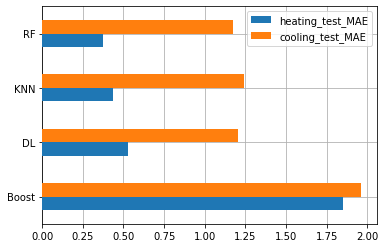

In [53]:
fig, ax = plt.subplots()
model_comparison.sort_values(by='heating_test_MAE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari grafik di atas, ternyata Random Forest memiliki nilai MAE yang terkecil, baik dari segi Heating_load maupun Cooling_load. Artinya, model Random Forest dapat memprediksi nilai Heating_load dan Cooling_load dengan nilai error yang lebih kecil. Dengan demikian, kita bisa menggunakan model Random Forest dengan parameter terbaik untuk memprediksi nilai heating load dan cooling load.